# import library

모델 구축에 필요한 라이브러리를 불러옵니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# data set 만들기

간단한 2차원 데이터를 생성하고 저장합니다.
코드파일의 경로에 Data라는 폴더를 생성해주면 data set을 성공적으로 저장합니다.

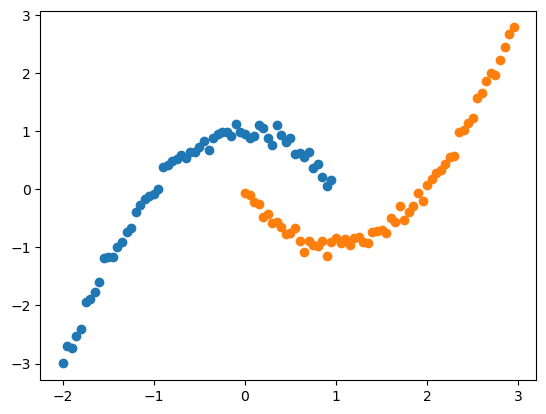

In [2]:
def f1(x):
    return -x**2+1
def f2(x):
    return x*(x-2)


x1 = np.arange(-2,1,0.05)
x2 = np.arange(0,3,0.05)

y1 = f1(x1)
y2 = f2(x2)

for i in range(len(y1)):
    
    y1[i] = y1[i] + np.random.normal(0,0.1)
    y2[i] = y2[i] + np.random.normal(0,0.1)

x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))

Data = np.zeros((2*len(y1),4))
Data = pd.DataFrame(Data,columns=['x','y','label','prediction'])

Data.iloc[:,0] = x
Data.iloc[:,1] = y
Data.iloc[:,3] = 0.5
Data.iloc[:len(y1),2] = 1
Data.iloc[len(y1):,2] = 0

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.show()

Data.to_csv('./Data/Data', sep=",", header = None, index = None)

# data set 불러오기

In [3]:
Data = pd.read_csv('./Data/Data',sep=",",header=None )
Data
Data = np.array(Data)

# tree module 만들기

leaf가 4개인 tree를 생성합니다. 
splitting critreria는 랜덤하게 생성됩니다.

In [4]:
class Tree:
    
    def __init__(self):
        
        self.cr1 = np.random.normal(0,1)
        self.cr2 = np.random.normal(0,1)
        self.cr3 = np.random.normal(0,1)
        self.leaf1 = [0]
        self.leaf2 = [0]
        self.leaf3 = [0]
        self.leaf4 = [0]
        
        
    def classify(self, data, lr):
        
        self.data = data
        self.lr = lr
        
        for i in range(self.data.shape[0]):
        
            x = self.data[i][0]
            y = self.data[i][1]

            if y > self.cr1:
                if x > self.cr2:
                    self.leaf1.append(self.data[i][2]-self.data[i][3])
                else:
                    self.leaf2.append(self.data[i][2]-self.data[i][3])
            elif x>self.cr3:
                self.leaf3.append(self.data[i][2]-self.data[i][3])
            else:
                self.leaf4.append(self.data[i][2]-self.data[i][3])

        self.leaf1 = np.mean(self.leaf1)
        self.leaf2 = np.mean(self.leaf2)
        self.leaf3 = np.mean(self.leaf3)
        self.leaf4 = np.mean(self.leaf4)
        
        for i in range(self.data.shape[0]):
        
            x = self.data[i][0]
            y = self.data[i][1]

            if y > self.cr1:
                if x > self.cr2:
                    Data[i][3] = Data[i][3] + self.lr*self.leaf1 
                    
                else:
                    Data[i][3] = Data[i][3] + self.lr*self.leaf2 
                    
            elif x>self.cr3:
                Data[i][3] = Data[i][3] + self.lr*self.leaf3 
            else:
                Data[i][3] = Data[i][3] + self.lr*self.leaf4 
        
        
        

# Gradient boost module 만들기

트리의 개수와 학습률, 그리고 데이터를 받습니다.
predict 메서드를 이용해 새로운 데이터의 예측 결과를 확인할 수 있습니다.

In [6]:
class GBM:
    
    def __init__(self,n_trees,data,lr):
        
        self.n_trees = n_trees
        self.data = data
        self.lr = lr
        self.s = 0
        
        while True:
            self.s+=1
            
            tree = Tree()
            tree.classify(Data,self.lr)
            
            if self.s>n_trees:
                break
            if np.mean(Data.T[3])<0.1:
                self.n_trees = self.s
                break
            tree_making = 'self.tree_%d = tree'%(self.s)
            exec(tree_making)
    
    def predict(self, data):
        
        self.newdata = data
        for i in range(self.newdata.shape[0]):
            x = self.newdata[i][0]
            y = self.newdata[i][1]
            for j in range(self.n_trees):
                aa = 'self.tree = self.tree_%d'%(j+1)
                exec(aa)
                
                if y > self.tree.cr1:
                    if x > self.tree.cr2:
                            newdata[i][2] = newdata[i][2] + self.lr*self.tree.leaf1
                            

                    else:
                        newdata[i][2] = newdata[i][2] + self.lr*self.tree.leaf2
                        

                elif x>self.tree.cr3:
                    newdata[i][2] = newdata[i][2] + self.lr*self.tree.leaf3
                    
                else:
                    newdata[i][2] = newdata[i][2] + self.lr*self.tree.leaf4
                    

                
            
        
        
            
            
            

GradientBoost모델을 학습시킵니다. 트리의 개수는 100개, 학습률은 0.1

In [7]:
GradientBoost = GBM(1000,Data,0.1)

# 새로운 data set으로 test

임의의 test data에 대한 결과를 보기 위해서, 새로운 test data를 다음처럼 생성합니다.  
x와 y 모두 -5부터 5까지 0.1단위로 추출합니다.  
즉 새로운 test data는, -5부터 5까지의 평면에 0.1단위로 찍은 점입니다.

In [8]:
newdata_x = np.arange(-5,5,0.1)
newdata_y = np.arange(-5,5,0.1)

newdata = np.zeros((len(newdata_x)*len(newdata_y),3))
newdata = pd.DataFrame(newdata)
newdata.iloc[:,2] = 0.5


for i in range(len(newdata_x)):
    newdata.iloc[len(newdata_x)*i:len(newdata_x)*(i+1),0] = newdata_x[i]
    newdata.iloc[len(newdata_x)*i:len(newdata_x)*(i+1),1] = newdata_y

newdata = np.array(newdata)
newdata

array([[-5. , -5. ,  0.5],
       [-5. , -4.9,  0.5],
       [-5. , -4.8,  0.5],
       ...,
       [ 4.9,  4.7,  0.5],
       [ 4.9,  4.8,  0.5],
       [ 4.9,  4.9,  0.5]])

새로운 test data에 대한 prediction을 진행합니다.

In [9]:
GradientBoost.predict(newdata)

# 최종 결과 확인

파란색, 주황색 그래프는 training data입니다.  
새로운 test data가 흰색 영역의 점이라면 파란색 class로,  
새로운 test data가 검은색 영역의 점이라면 주황색 class로 예측할 것입니다.  
오른쪽 그림의 수직,수평선을 통해 tree의 영향을 시각적으로 확인할 수 있습니다.  
오른쪽 그림에서 색이 진할수록 주황색 class로 예측될 확률이 큽니다.

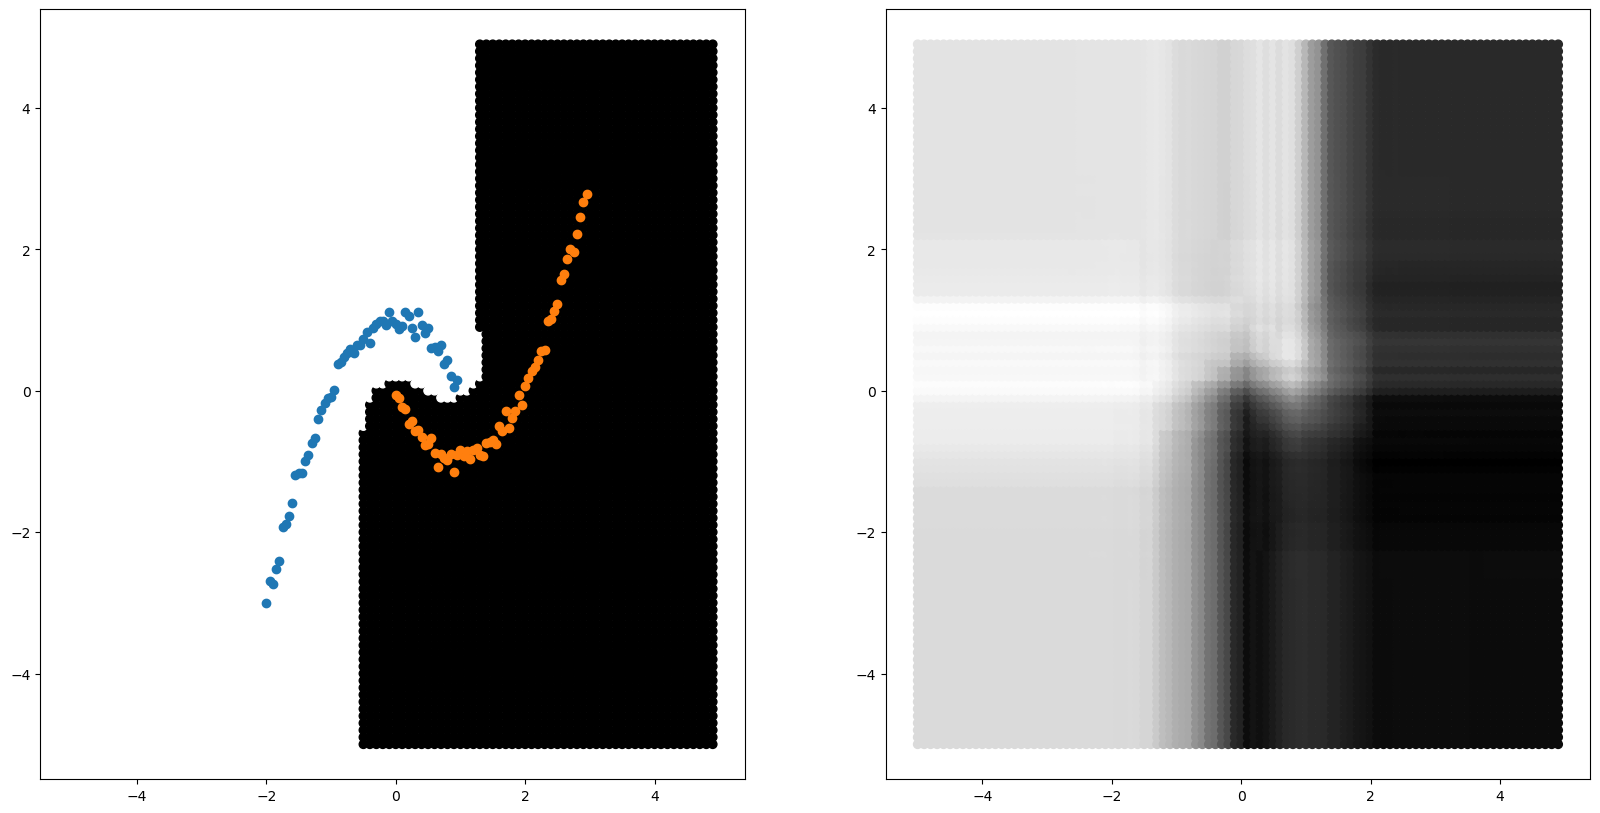

In [10]:
import copy
Data = np.array(newdata)
new_x_data = Data.T[0]
new_y_data = Data.T[1]
prediction = Data.T[2]
prediction_copy = copy.copy(prediction)
for i in range(len(prediction_copy)):
    if prediction_copy[i]>0.5:
        prediction_copy[i]=1
    else:
        prediction_copy[i]=0

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(new_x_data,new_y_data,c=prediction_copy,cmap='gray')
plt.scatter(x1,y1)
plt.scatter(x2,y2)

plt.subplot(1,2,2)
plt.scatter(new_x_data,new_y_data,c=prediction,cmap='gray')
plt.show()